## Projeto 2 - Ciência dos Dados

**Feito por:**

Cesar Ades

Diogo Duarte

Jonathan Sutton

Joras Oliveira

## Introdução

Para o Projeto 2 da disciplina de Ciência dos Dados, decidimos trabalhar com um target qualitativo, que classificaria se a música seria um “hit” ou não, com o critério de ela ter aparecido na lista semanal top 100 da empresa Billboard entre os anos de 2010 até 2019. Para chegar ao resultado final, utilizaremos um classificador com uma base de dados de aproximadamente 6400 músicas.

**Importando as bibliotecas a serem utilizadas**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix

**Começando a leitura e manipulação dos dados**

In [2]:
import chardet
with open('dataset-of-10s.csv', 'rb') as rawdata: # Abre o dataset
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [3]:
dados = pd.read_csv('dataset-of-10s.csv',encoding='utf-8') # Faz a leitura do Dataset.

del dados['uri'] # Coluna de identificação de músicas do Spotify removida, pois são valores únicos que não influenciam no trabalho.

dados.head(50) # Imprime as primeiros 50 músicas do Dataset.

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.6260,1,-4.826,0,0.0886,0.020000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,0.447,0.2470,5,-14.661,0,0.0346,0.871000,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,0.550,0.4150,9,-6.557,0,0.0520,0.161000,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.502,0.6480,0,-5.698,0,0.0527,0.005130,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.8870,1,-3.892,1,0.2750,0.003810,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1
5,Here's To Never Growing Up,Avril Lavigne,0.482,0.8730,0,-3.145,1,0.0853,0.011100,0.000000,0.4090,0.7370,165.084,214320,4,32.17301,12,1
6,Sex Metal Barbie,In This Moment,0.533,0.9350,0,-3.704,1,0.1280,0.013900,0.000000,0.1680,0.4810,140.092,262493,4,21.04510,14,0
7,Helluva Night,Ludacris,0.736,0.5220,2,-8.020,1,0.1160,0.029900,0.000000,0.1080,0.3690,97.547,200387,4,60.21027,10,1
8,Holiday With HH,No Bros,0.166,0.9850,7,-2.886,1,0.1700,0.001830,0.014200,0.9580,0.1390,174.725,252787,4,31.23583,11,0
9,My Last,Big Sean Featuring Chris Brown,0.387,0.7730,8,-5.685,1,0.1700,0.098000,0.000000,0.2090,0.3680,78.629,254120,4,23.30245,9,1


In [4]:
#Quantidade de Musicas
index = dados. index
number_of_rows = len(index)
print(f'Este Dataset tem:  {number_of_rows}' )

dados.shape #numero de linhas e colunas

Este Dataset tem:  6398


(6398, 18)

In [5]:
dados.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [6]:
print(dados.target.value_counts(True))
print(dados.dtypes)

1    0.5
0    0.5
Name: target, dtype: float64
track                object
artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object


In [7]:
#todos os hits

hit = dados.loc[dados["target"] == 1, :]
hit

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.706,108.029,188493,4,41.18681,10,1
2,Love Someone,Lukas Graham,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.274,172.065,205463,4,44.89147,9,1
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.780,160.517,144244,4,24.99199,8,1
5,Here's To Never Growing Up,Avril Lavigne,0.482,0.873,0,-3.145,1,0.0853,0.01110,0.000000,0.4090,0.737,165.084,214320,4,32.17301,12,1
7,Helluva Night,Ludacris,0.736,0.522,2,-8.020,1,0.1160,0.02990,0.000000,0.1080,0.369,97.547,200387,4,60.21027,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,Tear In My Heart,twenty one pilots,0.655,0.632,2,-4.802,1,0.0489,0.01890,0.000000,0.0722,0.447,120.113,188493,4,51.52804,8,1
6391,Sweater Weather,The Neighbourhood,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,240400,4,91.20552,7,1
6392,Untouchable,YoungBoy Never Broke Again,0.780,0.784,1,-5.039,1,0.1860,0.04470,0.000000,0.1220,0.430,85.023,180706,4,46.62277,8,1
6394,Calling My Spirit,Kodak Black,0.910,0.366,1,-9.954,1,0.0941,0.09960,0.000000,0.2610,0.740,119.985,152000,4,32.53856,8,1


In [8]:
#todos os nao hits
not_hit = dados.loc[dados["target"] == False, :]
not_hit

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
1,Surfboard,Esquivel!,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.8140,0.0946,0.2500,155.489,176880,3,33.18083,9,0
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.0000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
6,Sex Metal Barbie,In This Moment,0.533,0.935,0,-3.704,1,0.1280,0.01390,0.0000,0.1680,0.4810,140.092,262493,4,21.04510,14,0
8,Holiday With HH,No Bros,0.166,0.985,7,-2.886,1,0.1700,0.00183,0.0142,0.9580,0.1390,174.725,252787,4,31.23583,11,0
11,Cirrus,Bonobo,0.640,0.844,2,-8.412,0,0.0374,0.39500,0.9330,0.0827,0.3640,119.042,352247,4,80.60317,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,Gimme D' Road - Carnival Mix,Calypso Rose,0.395,0.927,4,-4.418,1,0.1650,0.11600,0.0000,0.4410,0.9410,188.384,191905,3,68.27089,8,0
6386,Vast Changes,Regentum,0.396,0.044,9,-25.088,0,0.0370,0.98400,0.9470,0.0802,0.0898,71.200,224636,5,15.34214,12,0
6393,Lotus Flowers,Yolta,0.172,0.358,9,-14.430,1,0.0342,0.88600,0.9660,0.3140,0.0361,72.272,150857,4,24.30824,7,0
6396,Stormy Weather,Oscar Peterson,0.600,0.177,7,-16.070,1,0.0561,0.98900,0.8680,0.1490,0.5600,120.030,213387,4,21.65301,14,0


**Análise explorátoria inicial**

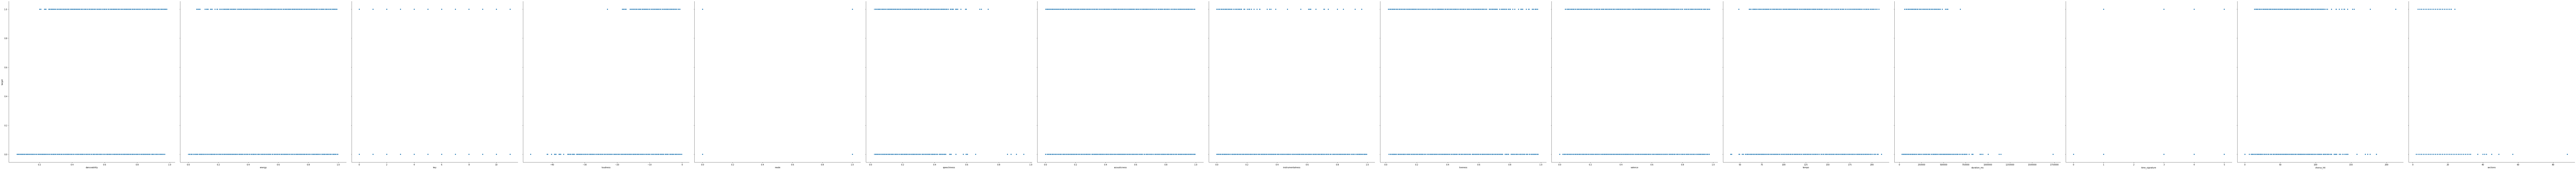

In [9]:
# Plotando gráficos que relacionam cada classificação com a feature

sns.pairplot(
    dados,
    x_vars = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',  'instrumentalness',  'liveness',  'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections'],
    y_vars = ['target'],
    height = 12,
)


**Análise** : jdbiu
wbdiqujwbd
ùoiqgdiv
qdb eo 87qb
w d8pewf7



**Começando a desenvolver Regressão Linear**

In [10]:
# Definindo o grupo de variáveis independentes
X = dados[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',  'instrumentalness',  'liveness',  'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']]

# Definindo o grupo de variáveis dependentes
y = dados[['target']]

# Montando o teste e treinamento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [11]:
# Aplicando a lógica da Regressão Linear

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/Users/Diogo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Diogo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


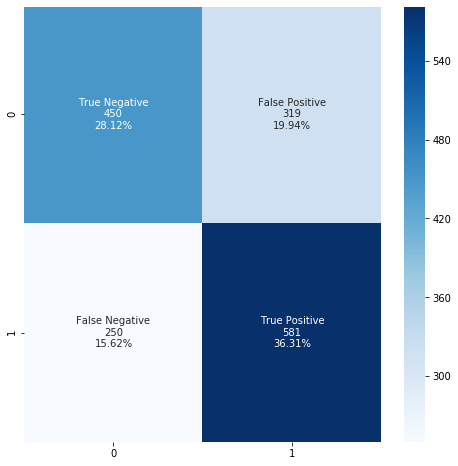

In [44]:
# Montando a matriz de confusão

lista = list(y_test['target'])

plt.figure(figsize=(8,8))

cf_matrix = confusion_matrix(lista, y_pred)


group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)



sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', )
plt.ylim(2, 0.01)



plt.show()



**Explicando o gráfico acima:**
    O gráfico mostra

In [42]:
# Mostrando a acúracia do nosso classificador

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.644375
